<a href="https://colab.research.google.com/github/leeCodingStudio/Python_NLP/blob/master/4_%EC%9B%8C%EB%93%9C_%EC%9E%84%EB%B2%A0%EB%94%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 워드 임베딩(Word Embedding)
* 단어를 컴퓨터가 이해하고, 효율적으로 처리할 수 있도록 단어를 벡터화하는 기술
* 단어를 밀집 벡터의 형태로 표현하는 방법
* 워드 임베딩 과정을 통해 나온 결과를 임베딩 벡터
* 워드 임베딩을 거쳐 잘 표현된 단어 벡터들은 계산이 가능하며, 모델에 입력으로 사용할 수 있음

### 1-1. 인코딩(Encoding)
* 기계는 자연어를 이해할 수 없기 때문에 데이터를 기계가 이해할 수 있도록 숫자 등으로 변환해주는 작업
* 자연어를 수치화된 벡터로 변환하는 작업

### 1-2. 희소 표현(Sparse Representation)
* 원-핫 인코딩을 통해서 나온 원-핫 벡터들은 표현하고자 하는 단어의 인덱스의 값만 1이고, 나머지 인덱스에는 전부 0으로 표현되는 벡터 표현 방법
* 벡터 또는 행렬의 값이 대부분이 0으로 표현되는 방법을 희소 표현이라고 함
* 원-핫 인코딩에 의해 만들어지는 벡터를 희소 벡터라고 함

### 1-3. 희소 벡터의 문제점
* 희소 벡터의 특징은 단어의 개수가 늘어나면 벡터의 차원이 한없이 커진다는 것
* 원-핫 벡터는 벡터 표현 방식이 매우 단순하여, 단순히 단어의 출현 여부만을 벡터에 표시할 수 있음
* 희소 벡터를 이용하여 문장 또는 텍스트 간의 유사도를 계산해보면 원하는 유사도를 얻기 힘듬

### 1-4. 밀집 표현(Dense Represenstation)
* 벡터의 차원이 조밀해졌다는 의미
* 사용자가 설정한 값으로 모든 단어의 벡터 표현의 차원을 맞추는 표현 방식
* 자연어를 밀집 표현으로 변환하는 인코딩 과정에서 0과 1의 binary 값이 아니라 연속적인 실수 값을 가질 수 있음

### 1-5. 밀집 표현의 장점
* 적은 차원으로 대상을 표현할 수 있음
* 더 큰 일반화 능력을 가지고 있음

### 1-6. 원-핫 벡터와 워드 인베딩의 차이

|종류|원-핫 백터|워드 임베딩|
|------|---|---|
|차원|고차원(단어의 집합의 크기)|저차원으로 표현 가능|
|종류|희소 백터|밀집 백터|
|표현방법|수동|학습 코퍼스에서 학습|
|값의 유형|0,1|실수|

### 1-7. 차원 축소(Dimensionality Reduction)
* 희소 벡터를 밀집 벡터의 형태로 변환하는 방법
* 머신러닝에서 많은 피터들로 구성된 고차원의 데이터에서 중요한 피처들만 뽑아 저차원의 데이터(행렬)로 변환하기 위해 사용
    - PCA(Principal Component Analysis)
    - 잠재 의미 분석(Latent Semantic Analysis)
    - 잠재 디리클레 할당(Latent Dirichlet Allocation, LDA)
    - SVD(Sigular Value Decomposition, SVD)

# 2. Word2Vec

### 2-1. 분산 표현(Distributed Representation)
* 분포 가설이라는 가정 하에 만들어진 표현 방법
* 분포 가설: "비슷한 문맥에서 등장하는 단어들은 비슷한 의미를 가진다"는 가설
* 분포 가설의 목표는 단어 주변의 단어들, window 크기에 따라 정의되는 문맥의 의미를 이용해 단어를 벡터로 표현(분산 표현) 하는 것
* 분산 표현으로 표현된 벡터들은 원-핫 벡터처럼 차원이 단어 집합의 크기일 필요가 없으므로, 벡터의 차원이 상대적으로 저차원으로 줄어듬
* 밀집 표현을 분산 표현이라 부르기도 함
* 희소 표현에서는 각각의 차원이 각각의 독립적인 정보를 갖고 있지만, 밀집에서는 하나의 차원이 여러 속성들이 버무려진 정보를 갖고 있음
* 밀집 표현을 이용한 대표적인 학습 방법이 WOrd2Vec 임

### 2-2. Word2Vec이란?
* 분포 가설 하에 표현한 분산 표현을 따르는 워드 임베딩 모델
* Google이 2013년도 처음 공개
* 중심 단어와 주변의 단어들을 사용하여 단어를 예측하는 방식으로 임베딩을 만듬
* WOrd2Vec의 학습 방식에는 두가지 방식
    - CBOW(Continuous Bag of Words)
    - Skip-gram

### 2-3. CBOW(Continuous Bag of Words)
* [Word2Vec](https://wikidocs.net/22660)
* 주변에 있는 단어들을 보고 중간에 있는 단어를 예측하는 방법
* 주변 단어(context)는 타겟 단어(target word)의 직전 n개 단어와 직후 n개 단어를 의미하며, 이 범위를 window라 부르고, n을 window size라고 함
* 문장 하나에 대해 한 번만 학습을 진행하는 것은 아깝기 때문에 sliding window 방식을 사용하여 하나의 문장을 가지고 여러 개의 학습 데이터셋을 만듬
* Word2Vec은 최초 입력으로 one-hot-vector를 받는데, 1*V 크기의 one-hot-vector의 각 요소와 hidden layer N개의 각 노드는 1대1 대응이 이워져야 하므로 가중치 행렬 W의 크기는 VXN이 됨
* 학습 코퍼스에 단어가 10,000개 있고 hidden layer의 노드를 300개로 지정하면, 가중치 행렬 W는 10,000 * 300 행렬 형태가 됨
* 각각의 가중치 행렬은 랜덤한 값으로 초기화되어 있고, 학습 시 target word를 맞추는 과정에서 W가 계속해서 조정됨
* 예를들어 4개의 단어들이 target word 예측에 사용될 때 각각의 단어들에 해당하는 W의 임베딩 벡터들의 평균을 사용함
* 평균 벡터는 두 번째 가중치 행렬 W' 와 곱해지며 곱해진 경과로는 target word의 원 핫 벡터와 크기가 동일한 벡터를 얻을 수 있음
* 최종 출력 값 벡터는 다중 클래스 분류 문제를 위한 일종의 스코어 벡터이며 0과 1사이의 값을 가지는데 이는 중심 단어일 확률을 나타냄
* 스코어 벡터 값은 정답 레이블에 해당하는 target word의 원-핫 벡터 내 1의 값에 가까워져야 함
* 스코어 벡터와 원-핫 벡터의 오차를 줄이기 위해 손실 함수(cross-entropy) 함수를 사용함

### 2-4. Skip-gram
* 중심 단어에서 주변 단어를 예측
* 중심 단어를 sliding window 하면서 학습 데이터를 증강
* 중심 단어를 가지고 주변 단어를 예측하는 방법이기 때문에 projecttion layer에서 벡터들 간의 평균을 구하는 과정이 없으며 대신 output layer를 통해 벡터가 window size의 2n개 만큼 나옴

### 2-5. CBOW vs Skip-gram
* Skip-gram이 CBOW에 비해 여러 문맥을 고려하기 때문에 Skip-gram의 성능이 일반적으로 더 좋음
* Skip-gram이 단어 당 학습 횟수가 더 많고, 임베딩의 조정 기회가 많으므로 더 정교한 임베딩 학습이 가능

```
작고 귀여운 강아지 문 앞에 앉아 있다
```

|     | CBOW |  |
| --- | --------- | ----------------- |
| Input  | Output | 학습기회 |
| 귀여운, 강아지 | 작고 | 1 |
| 작고, 강아지, 문 | 귀여운 | 1 |
| 작고, 귀여운, 문, 앞에 | 강아지 | 1 |
| 귀여운, 강아지, 앞에, 앉아 | 문 | 1 |
| 강아지, 문, 앉아, 있다 | 앞에 | 1 |
| 앞에, 앉아 | 있다 | 1 |

|     | Skip-gram |  |
| --- | --------- | ----------------- |
| Input  | Output | 학습기회 |
| 작고 | 귀여운, 강아지 | 2 |
| 귀여운 | 작고, 강아지, 문 | 3 |
| 강아지 | 작고, 귀여운, 문, 앞에 | 4 |
| 문 | 귀여운, 강아지, 앞에, 앉아 | 4 |
| 앞에 | 강아지, 문, 앉아, 있다 | 4 |
| 앉아 | 문, 앞에, 있다 | 3 |
| 있다 | 앞에, 앉아 | 2 |

### 2-6. Word2Vec의 한계점
* 단어의 형태학적 특성을 반영하지 못함
- 예) teach, teacher, tearchers 와 같이 세 단어는 의미적으로 유사한 단어지만 각 단어를 개별단어로 처리하여 세 단어 모두 벡터 값이 다르게 구성됨
* 단어 빈도 수의 영향을 많이 받아 희소한 단어를 임베딩하기 어려움
* OOV(Out of Vocabulary)의 처리가 어려움
- 새로운 단어가 등장하면 데이터 전체를 다시 학습시켜야 함
* 단어 사전의 크기가 클수록 학습하는데 오래거림
- 단어 사전의 크기가 수 만개 이상인 경우, Word2Vec은 학습하기에 무거운 모델이 됨

### 2-7. Word2Vec의 학습 트릭
* Subsampling Frequent Words
    - 자연어 코퍼스에서 자주 등장하는 단어의 학습향을 확률적인 방법으로 줄이는 것
    - 등장 빈도가 높을수록 단어가 업데이트 될 기회가 많기 때문

    * $$ P(w_i) = 1 - \sqrt\frac{t}{f(w_i)}$$

    - f(Wi)는 해당 단어가 말뭉치에 등장할 비율(해당 단어 빈도/전체 단어수)
    - t는 사용자가 지정해주는 값으로, 연구팀에서는 0.0001을 권장
    - 예) 만약 f(Wi)가 0.01로 나타나는 빈고 높은 단어는 위 식으로 계산한 P(Wi)가 0.9684이므로, 100번의 학습 기회 가운데 96번 정도는 학습에서 제외하게 됨
    - 등장 비율이 적어 P(Wi)가 0에 가깝다면 해당 단어가 나올 때마다 빼놓지 않고 학습
    - 학습량을 효과적으로 줄여 계산량을 감소시키는 전략
* Negative Sampling
    - 학습하는 중심 단어와 주변 단어들 외에, 이 단어들과 별 연관 없는 수많은 단어의 임베딩까지 업데이트하는 것은 비효율적임
    - 무작위로 네거티브 샘플들을 선택하여, 하나의 중심 단어에 대해 [주변단어 + 네거티브 샘플들]로만 구성된 작은 단어 집합을 만들어서 학습하면 훨씬 효뉼적으로 학습할 수 있을 것
    - positive samplle 은 1로, negative sample은 0으로 간주하는 binary classification 형식의 학습 방법을 사용
    - 모델을 학습할 때 기존의 Skip-gram과 다르게, target words에 대해서 단어 사전의 subset에 대해서만 학습을 진행할 수 있으므로 효율적으로 학습

  * $P(w_i)_n = (\frac{f(w_i)}{ \sum_{j=1}^{n} f(w_i)})^3 / _4$



# 3. FastText
* 분포 가설하에 표현한 분산 표현을 따르는 또 다른 임베딩 모델
* 2017년 페이스북에서 공개한 워드 임베딩 기법

### 3-1. FastText 동작 원리
* <, >는 단어의 경계를 나타내기 위한 특수 기호
* 단어를 먼저 <, >로 감싼 후, 설정한 n-gram의 값에 따라 앞에서부터 단어를 쪼갬
* 마지막에 본 단어를 설명하기 위해 <, >으로 감싸진 전체 단어를 하나 추가함
* n-gram 설정은 최소값과 최대값을 설정할 수 있음

### 3-2. FastText의 장점
* 오타나 모르는 단어에 대한 대응
* 단어 집합 내 빈도 수가 적었던 단어에 대한 대응
* 자연어 코퍼스 내 노이즈에 대응

### 과제.
임베딩 방법론 중 "GloVe"의 작동원리에 대해 이해해보자

# 4. 워드 임베딩 구축하기

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_20newsgroups

In [ ]:
dataset = fetch_20newsgroups(shuffle=True, random_state=10, remove=('headers', 'footers', 'quotes'))
# dataset
# dataset.data
dataset = dataset.data

In [ ]:
dataset[0]

'Someone in Canada asked me to send him some public domain DES file\nencryption code I have.  Is it legal for me to send it?\n\nThanx.\n--\nEschew Obfuscation\n\nRob deFriesse                    Mail:  rj@ri.cadre.com\nCadre Technologies Inc.          Phone:  (401) 351-5950\n222 Richmond St.                 Fax:    (401) 351-7380\nProvidence, RI  02903'

In [ ]:
# 데이터셋 총 개수
len(dataset)

11314

In [ ]:
news_df = pd.DataFrame({'document':dataset})
news_df

,document
0,Someone in Canada asked me to send him some pu...
1,\n\nI see . . . you're not running Ultrix!\n\n...
2,"\nFor the first Move incident (no bomb, severa..."
3,"Okay, I'm trying to install NCSA telnet on a c..."
4,Hi everyone. I recently posted about how I rec...
...,...
11309,We have a minivas-2 and we want to record to a...
11310,Videonics Title maker System\n================...
11311,"\n\nAnas, of course ! The YAHUD needed blood f..."
11312,From: push@media.mit.edu (Pushpinder Singh)\nS...


In [ ]:
# 데이터셋에 결측값이 있는지 확인하기
news_df.replace('', float('NaN'), inplace=True)
print(news_df.isnull().values.any())

True


In [ ]:
# 데이터셋의 결측값을 제거 후 데이터셋 총 개수
news_df = news_df.dropna().reset_index(drop=True)
print(f'필터링된 데이터셋 총 개수: {len(news_df)}')

필터링된 데이터셋 총 개수: 11096


In [ ]:
news_df

,document
0,Someone in Canada asked me to send him some pu...
1,\n\nI see . . . you're not running Ultrix!\n\n...
2,"\nFor the first Move incident (no bomb, severa..."
3,"Okay, I'm trying to install NCSA telnet on a c..."
4,Hi everyone. I recently posted about how I rec...
...,...
11091,We have a minivas-2 and we want to record to a...
11092,Videonics Title maker System\n================...
11093,"\n\nAnas, of course ! The YAHUD needed blood f..."
11094,From: push@media.mit.edu (Pushpinder Singh)\nS...


In [ ]:
# 열을 기준으로 중복된 데이터를 제거
processed_news_df = news_df.drop_duplicates(['document']).reset_index(drop=True)
processed_news_df

,document
0,Someone in Canada asked me to send him some pu...
1,\n\nI see . . . you're not running Ultrix!\n\n...
2,"\nFor the first Move incident (no bomb, severa..."
3,"Okay, I'm trying to install NCSA telnet on a c..."
4,Hi everyone. I recently posted about how I rec...
...,...
10988,We have a minivas-2 and we want to record to a...
10989,Videonics Title maker System\n================...
10990,"\n\nAnas, of course ! The YAHUD needed blood f..."
10991,From: push@media.mit.edu (Pushpinder Singh)\nS...


In [ ]:
# 데이터셋에 특수 문자를 제거
processed_news_df['document'] = processed_news_df['document'].str.replace('[^a-zA-Z]', ' ')
processed_news_df

<ipython-input-131-767603303ad8>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  processed_news_df['document'] = processed_news_df['document'].str.replace('[^a-zA-Z]', ' ')


,document
0,Someone in Canada asked me to send him some pu...
1,I see you re not running Ultrix ...
2,For the first Move incident no bomb several...
3,Okay I m trying to install NCSA telnet on a c...
4,Hi everyone I recently posted about how I rec...
...,...
10988,We have a minivas and we want to record to a...
10989,Videonics Title maker System ...
10990,Anas of course The YAHUD needed blood for...
10991,From push media mit edu Pushpinder Singh Su...


In [ ]:
# 데이터셋에 길이가 너무 짧은 단어를 제거(단어의 길이가 2이하)
processed_news_df['document'] = processed_news_df['document'].apply(lambda x: ' '.join([token for token in x.split() if len(token) > 2]))
processed_news_df

,document
0,Someone Canada asked send him some public doma...
1,see you not running Ultrix Steve
2,For the first Move incident bomb several membe...
3,Okay trying install NCSA telnet couple okay wh...
4,everyone recently posted about how received ba...
...,...
10988,have minivas and want record Abekas have most ...
10989,Videonics Title maker System about monthes old...
10990,Anas course The YAHUD needed blood for the mat...
10991,From push media mit edu Pushpinder Singh Subje...


In [ ]:
# 전체 길이가 200 이하이거나 전체 단어 개수가 5개 이하인 데이터를 필터링
processed_news_df = processed_news_df[processed_news_df.document.apply(lambda x: len(str(x)) > 200 and len(str(x).split()) > 5)].reset_index(drop=True)
processed_news_df

,document
0,Okay trying install NCSA telnet couple okay wh...
1,everyone recently posted about how received ba...
2,one should EVER rely just magazine determine w...
3,Rick Anderson replied letter with article ELp ...
4,Description External Tank option for SSF redes...
...,...
8194,loved Dan Kelly was USA when first got hooked ...
8195,have minivas and want record Abekas have most ...
8196,Videonics Title maker System about monthes old...
8197,Anas course The YAHUD needed blood for the mat...


In [ ]:
# 전체 단어에 대한 소문자 변환
processed_news_df['document'] = processed_news_df['document'].str.lower()
processed_news_df

,document
0,okay trying install ncsa telnet couple okay wh...
1,everyone recently posted about how received ba...
2,one should ever rely just magazine determine w...
3,rick anderson replied letter with article elp ...
4,description external tank option for ssf redes...
...,...
8194,loved dan kelly was usa when first got hooked ...
8195,have minivas and want record abekas have most ...
8196,videonics title maker system about monthes old...
8197,anas course the yahud needed blood for the mat...


In [ ]:
import nltk
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stop_words = stopwords.words('english')
print(len(stop_words))
print(stop_words[:10])

179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [ ]:
# 데이터셋에 불용어를 제외하여 띄어쓰기 단위로 문장을 분리
tokenized_doc = processed_news_df['document'].apply(lambda x: x.split())
tokenized_doc = tokenized_doc.apply(lambda x: [s_word for s_word in x if s_word not in stop_words])
tokenized_doc

0       [okay, trying, install, ncsa, telnet, couple, ...
1       [everyone, recently, posted, received, bad, vr...
2       [one, ever, rely, magazine, determine, car, bu...
3       [rick, anderson, replied, letter, article, elp...
4       [description, external, tank, option, ssf, red...
                              ...                        
8194    [loved, dan, kelly, usa, first, got, hooked, h...
8195    [minivas, want, record, abekas, functions, wor...
8196    [videonics, title, maker, system, monthes, old...
8197    [anas, course, yahud, needed, blood, matza, pa...
8198    [push, media, mit, edu, pushpinder, singh, sub...
Name: document, Length: 8199, dtype: object

In [ ]:
tokenized_doc = tokenized_doc.to_list()
print(len(tokenized_doc))

8199


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
tokenizer = Tokenizer()

In [ ]:
tokenizer.fit_on_texts(tokenized_doc)

In [ ]:
word2idx = tokenizer.word_index
idx2word = {value: key for key, value in word2idx.items()}
encoded = tokenizer.texts_to_sequences(tokenized_doc)

In [ ]:
vocab_size = len(word2idx) + 1
print(f'단어 사전의 크기: {vocab_size}')

단어 사전의 크기: 70992


In [ ]:
print(encoded[0])

[1591, 194, 1431, 5766, 4027, 424, 1591, 250, 1459, 693, 107, 1073, 22061, 120, 37008, 27005, 658, 37009, 658, 14848, 1034, 411, 13, 3614, 4027, 29, 115, 7777, 458, 97, 1703, 42, 14849, 791, 4027, 7777, 5, 72, 3248, 32, 4027, 911, 50, 673, 393, 76, 137, 95, 7202, 7202, 27006, 151, 314, 11552, 18821, 1592, 111, 205]


In [ ]:
# 네거티브 샘플링을 위해 keras에서 제공하는 전처리 도구 skipgrams 사용
from tensorflow.keras.preprocessing.sequence import skipgrams

In [ ]:
skip_grams = [skipgrams(sample, vocabulary_size=vocab_size, window_size=10) for sample in encoded[:5]]
print(f'전체 샘플 수: {len(skip_grams)}')

전체 샘플 수: 5


In [ ]:
# skip_grams[0]에 skipgrams로 형성된 데이터셋 확인
pairs, labels = skip_grams[0][0], skip_grams[0][1]
print(f'3 pairs: {pairs[:3]}')
print(f'3 labels: {labels[:3]}')

3 pairs: [[151, 18821], [7777, 42674], [50, 24395]]
3 labels: [1, 0, 0]


In [ ]:
# 첫번째 뉴스 그룹 샘플에 대해 생긴 pairs와 labels의 개수
print(len(pairs))
print(len(labels))

2100
2100


In [ ]:
for i in range(5):
    print('({:s} ({:d}), {:s} ({:d})) -> {:d}'.format(
        idx2word[pairs[i][0]], pairs[i][0],
        idx2word[pairs[i][1]], pairs[i][1],
        labels[i]
    ))

(computer (151), bowling (18821)) -> 1
(appletalk (7777), mfx (42674)) -> 0
(please (50), rik (24395)) -> 0
(belive (14848), clever (5968)) -> 0
(jeremy (7202), becuase (10479)) -> 0


In [ ]:
training_dataset = [skipgrams(sample, vocabulary_size=vocab_size, window_size=10) for sample in encoded[:5000]]

In [ ]:
len(training_dataset)

5000

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, Reshape, Activation, Input, Dot
from tensorflow.keras.utils import plot_model

In [ ]:
embedding_dim = 100

# 중심 단어를 위한 임베딩 테이블
w_inputs = Input(shape=(1,), dtype='int32')
word_embedding = Embedding(vocab_size, embedding_dim)(w_inputs)

c_inputs = Input(shape=(1,), dtype='int32')
context_embedding = Embedding(vocab_size, embedding_dim)(c_inputs)

In [ ]:
dot_product = Dot(axes=2)([word_embedding, context_embedding])
dot_product = Reshape((1,), input_shape=(1, 1))(dot_product)
output = Activation('sigmoid')(dot_product)

model = Model(inputs = [w_inputs, c_inputs], outputs=output)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 input_6 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 embedding_4 (Embedding)        (None, 1, 100)       7099200     ['input_5[0][0]']                
                                                                                                  
 embedding_5 (Embedding)        (None, 1, 100)       7099200     ['input_6[0][0]']                
                                                                                            

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam')

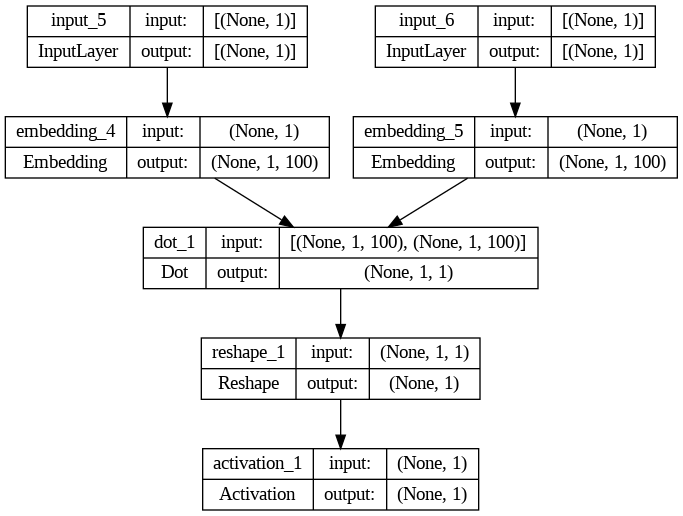

In [ ]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [ ]:
# for _, elem in enumerate(skip_grams):
#     # print(elem)
#     first_elem = np.array(list(zip(*elem[0]))[0], dtype='int32')
#     second_elem = np.array(list(zip(*elem[0]))[1], dtype='int32')
#     print(first_elem)
#     print()
#     print(second_elem)

In [ ]:
for epoch in range(100):
    loss = 0
    for _, elem in enumerate(skip_grams):
        first_elem = np.array(list(zip(*elem[0]))[0], dtype='int32')
        second_elem = np.array(list(zip(*elem[0]))[1], dtype='int32')
        labels = np.array(elem[1], dtype='int32')
        X = [first_elem, second_elem]
        Y = labels
        loss += model.train_on_batch(X, Y)
    print('Epoch: ', epoch+1, 'Loss: ', loss)

Epoch:  1 Loss:  3.46570360660553
Epoch:  2 Loss:  3.4585976004600525
Epoch:  3 Loss:  3.4514755606651306
Epoch:  4 Loss:  3.4436960220336914
Epoch:  5 Loss:  3.4349659085273743
Epoch:  6 Loss:  3.4249982833862305
Epoch:  7 Loss:  3.4135131239891052
Epoch:  8 Loss:  3.400240421295166
Epoch:  9 Loss:  3.3849217891693115
Epoch:  10 Loss:  3.3673125505447388
Epoch:  11 Loss:  3.3471837043762207
Epoch:  12 Loss:  3.3243255615234375
Epoch:  13 Loss:  3.298550069332123
Epoch:  14 Loss:  3.269695460796356
Epoch:  15 Loss:  3.2376282811164856
Epoch:  16 Loss:  3.202246308326721
Epoch:  17 Loss:  3.1634808778762817
Epoch:  18 Loss:  3.1212993264198303
Epoch:  19 Loss:  3.0757055282592773
Epoch:  20 Loss:  3.026739716529846
Epoch:  21 Loss:  2.974479377269745
Epoch:  22 Loss:  2.9190369248390198
Epoch:  23 Loss:  2.860559821128845
Epoch:  24 Loss:  2.7992271780967712
Epoch:  25 Loss:  2.7352490425109863
Epoch:  26 Loss:  2.668862462043762
Epoch:  27 Loss:  2.600328177213669
Epoch:  28 Loss:  2.5

In [ ]:
import gensim

In [ ]:
f = open('vectors.txt', 'w')
f.write('{} {}\n'.format(vocab_size-1, embedding_dim))
vectors = model.get_weights()[0]
# print(vectors)
for word, i in tokenizer.word_index.items():
    f.write('{} {}\n'.format(word, ' '.join(map(str, list(vectors[i, :])))))
f.close()

In [ ]:
w2v = gensim.models.KeyedVectors.load_word2vec_format('./vectors.txt', binary=False)

In [ ]:
w2v.most_similar(positive=['apple'])

[('dog', 0.41124171018600464),
 ('xdswm', 0.40492895245552063),
 ('ellet', 0.3998315930366516),
 ('mkjznkjz', 0.3914651572704315),
 ('enlargement', 0.38903042674064636),
 ('gallagher', 0.3722364008426666),
 ('luh', 0.3720100224018097),
 ('xtgetactionkeysym', 0.36217817664146423),
 ('cipher', 0.35908055305480957),
 ('reaped', 0.34794992208480835)]

In [ ]:
w2v.most_similar(positive=['doctor'])

[('disch', 0.3957732319831848),
 ('ney', 0.3906957507133484),
 ('veos', 0.3820001184940338),
 ('hierarchy', 0.37917840480804443),
 ('ponder', 0.3765055537223816),
 ('offshoot', 0.3741574287414551),
 ('vakiflar', 0.35961341857910156),
 ('raytracing', 0.35934603214263916),
 ('volumetric', 0.3586407005786896),
 ('anstettj', 0.35818198323249817)]

In [ ]:
w2v.most_similar(positive=['engine'])

[('itz', 0.4009971022605896),
 ('hqy', 0.3782673478126526),
 ('subtle', 0.3769959509372711),
 ('informal', 0.3588967025279999),
 ('degauss', 0.357398122549057),
 ('bqodk', 0.35615307092666626),
 ('infoline', 0.3544870913028717),
 ('batse', 0.3540104031562805),
 ('hold', 0.353756308555603),
 ('zam', 0.34748825430870056)]

### 과제
[AI Hub](https://www.aihub.or.kr/)에 공개되어 있는 한국어 도서 요약 데이터셋을 활용하여 한국어 워드 임베딩 구축